<a href="https://colab.research.google.com/github/farahBassoumi/flightDelayPrediction/blob/main/projet_DM_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import libraries**

---



In [2]:
import pandas as pd
import pyarrow.parquet as pq
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import OrdinalEncoder
import requests
import json
from google.colab import userdata
import time
from datetime import date

#  Dataset USA n°1

---



In [ ]:
data=pd.read_csv('Airline_Delay_Cause.csv')

In [ ]:
data.shape

(12610, 21)

In [ ]:
data.head()

,year,month,carrier,carrier_name,airport,airport_name,arr_flights,arr_del15,carrier_ct,weather_ct,...,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2022,5,9E,Endeavor Air Inc.,ABE,"Allentown/Bethlehem/Easton, PA: Lehigh Valley ...",136.0,7.0,5.95,0.00,...,0.0,1.00,0.0,0.0,255.0,222.0,0.0,4.0,0.0,29.0
1,2022,5,9E,Endeavor Air Inc.,ABY,"Albany, GA: Southwest Georgia Regional",91.0,16.0,7.38,0.00,...,0.0,6.09,0.0,0.0,884.0,351.0,0.0,81.0,0.0,452.0
2,2022,5,9E,Endeavor Air Inc.,ACK,"Nantucket, MA: Nantucket Memorial",19.0,2.0,0.13,0.00,...,0.0,0.88,1.0,0.0,138.0,4.0,0.0,106.0,0.0,28.0
3,2022,5,9E,Endeavor Air Inc.,AEX,"Alexandria, LA: Alexandria International",88.0,14.0,7.26,0.76,...,0.0,1.64,0.0,0.0,947.0,585.0,35.0,125.0,0.0,202.0
4,2022,5,9E,Endeavor Air Inc.,AGS,"Augusta, GA: Augusta Regional at Bush Field",181.0,19.0,13.84,0.00,...,0.0,2.09,0.0,0.0,808.0,662.0,0.0,87.0,0.0,59.0


In [ ]:
data.describe()

,year,month,arr_flights,arr_del15,carrier_ct,weather_ct,nas_ct,security_ct,late_aircraft_ct,arr_cancelled,arr_diverted,arr_delay,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
count,12610.000000,12610.000000,12603.000000,12596.000000,12603.000000,12603.000000,12603.000000,12603.000000,12603.000000,12603.000000,12603.000000,12603.000000,12603.000000,12603.000000,12602.000000,12602.000000,12602.000000
mean,2021.673275,5.695718,322.103309,62.404493,24.526767,1.987442,15.037933,0.227550,20.590191,8.622947,0.689598,4088.978100,1713.372927,209.175434,668.630852,9.950246,1488.018489
std,0.469034,4.055854,889.350454,159.990572,58.562256,7.476634,47.221216,0.945624,60.048813,34.708190,2.527671,11330.220354,4840.119865,871.940967,2271.699263,46.455215,4447.729208
min,2021.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2021.000000,2.000000,44.000000,7.000000,2.760000,0.000000,0.620000,0.000000,1.270000,0.000000,0.000000,362.000000,136.000000,0.000000,20.000000,0.000000,67.000000
50%,2022.000000,4.000000,89.000000,16.000000,7.150000,0.140000,2.950000,0.000000,4.310000,1.000000,0.000000,996.000000,425.000000,8.000000,108.000000,0.000000,281.000000
75%,2022.000000,11.000000,215.000000,45.000000,19.765000,1.545000,8.970000,0.000000,13.160000,5.000000,0.000000,2805.500000,1279.000000,123.000000,363.000000,0.000000,964.000000
max,2022.000000,12.000000,18297.000000,2713.000000,1012.390000,226.000000,1391.740000,41.970000,1083.180000,1565.000000,70.000000,205289.000000,102534.000000,27876.000000,84155.000000,1978.000000,76911.000000


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12610 entries, 0 to 12609
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   year                 12610 non-null  int64  
 1   month                12610 non-null  int64  
 2   carrier              12610 non-null  object 
 3   carrier_name         12610 non-null  object 
 4   airport              12610 non-null  object 
 5   airport_name         12610 non-null  object 
 6   arr_flights          12603 non-null  float64
 7   arr_del15            12596 non-null  float64
 8   carrier_ct           12603 non-null  float64
 9   weather_ct           12603 non-null  float64
 10  nas_ct               12603 non-null  float64
 11  security_ct          12603 non-null  float64
 12  late_aircraft_ct     12603 non-null  float64
 13  arr_cancelled        12603 non-null  float64
 14  arr_diverted         12603 non-null  float64
 15  arr_delay            12603 non-null 

In [ ]:
# what percentage do the null values represent in the entire dataset
print(data.isnull().sum() / len(data) * 100)

year                   0.000000
month                  0.000000
carrier                0.000000
carrier_name           0.000000
airport                0.000000
airport_name           0.000000
arr_flights            0.055511
arr_del15              0.111023
carrier_ct             0.055511
weather_ct             0.055511
nas_ct                 0.055511
security_ct            0.055511
late_aircraft_ct       0.055511
arr_cancelled          0.055511
arr_diverted           0.055511
arr_delay              0.055511
carrier_delay          0.055511
weather_delay          0.055511
nas_delay              0.063442
security_delay         0.063442
late_aircraft_delay    0.063442
dtype: float64


The percentage of null values for all attributes is  negligible (<1 %),therefore, we can safely delete the rows presenting null values since  they're insignificant to the overall dataset

Questions:
- Which attributes are strongly correlated?
- What are the most common delay times?
- Which airline(carrier) has the highest delay minutes?
- Which airport has the highest delay minutes?
- What season (Autumn,Winter,Spring,Summer) has the  most delayed flights?
- What types of delay influence the arrival and departure delays the most?

**Which attributes are strongly correlated?**

---



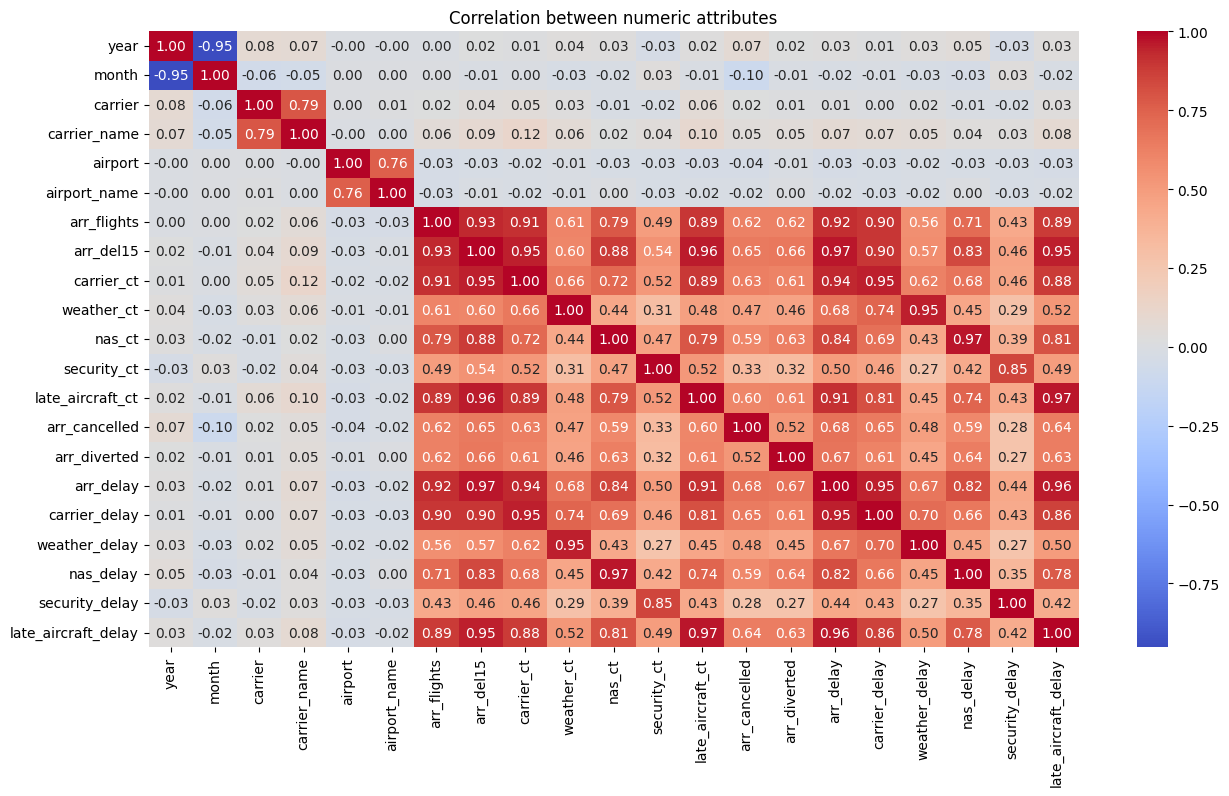

In [ ]:
#encode nominal attributes into numerical values
df = data.copy()
col_object = list(data.select_dtypes(include='object').columns)
df[col_object] = df[col_object].astype('category')
encoder = OrdinalEncoder()
df[col_object] = df[col_object].apply(lambda x: encoder.fit_transform(x.values.reshape(-1, 1)).flatten())

correlation_matrix=df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between  attributes")
plt.show()

The heatmap shows  a strong correlation between these pairs of attributes:

- security_delay and security_ct are 97% correlated
- weather_delay and weather_ct are 95% correlated
- carrier_delay and carrier_ct are 95% correlated
- nas_delay and nas_ct are 97% correlated
We assume that the X_delay attributes represent the delays caused by X in minutes while X_ct attributes represent the number of flights where the specific delay occured.These groups provide redundant information,therefore, it's safe to delete the X_ct attributes.

We also note a strong corrleation between arr_del15 and arr_delay of 97%.We assume that arr_delay represents the sum of *all* delays in minutes while arr_del15 represents the sum of delays exceeding 15 mins only. It's safe in this case to dispose of the arr_del15 attribute because it provides redundant information.

# **Dataset TunisAir**

---






In [3]:
data=pd.read_csv('./train+weather.csv')

FileNotFoundError: [Errno 2] No such file or directory: './train+weather.csv'

In [ ]:
data.shape

(31048, 14)

The dataset contains 10 attributes and  107 833 rows

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31048 entries, 0 to 31047
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   ID                         31048 non-null  object 
 1   DATOP                      31048 non-null  object 
 2   FLTID                      31048 non-null  object 
 3   DEPSTN                     31048 non-null  object 
 4   ARRSTN                     31048 non-null  object 
 5   STD                        31048 non-null  object 
 6   STA                        31048 non-null  object 
 7   STATUS                     31048 non-null  object 
 8   AC                         31048 non-null  object 
 9   target                     31047 non-null  float64
 10  Scheduled_Departure_Month  31048 non-null  int64  
 11  Scheduled_Arrival_Month    31048 non-null  int64  
 12  wx_phrase_dep              11760 non-null  object 
 13  wx_phrase_arr              11785 non-null  obj

In [ ]:
data.head()

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Scheduled_Departure_Month,Scheduled_Arrival_Month,wx_phrase_dep,wx_phrase_arr
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,1,1,Mostly Cloudy,Partly Cloudy
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,1,1,Fair,Fair
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,1,1,Partly Cloudy,NaN
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,1,1,Partly Cloudy / Windy,Mostly Cloudy
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,1,1,Partly Cloudy,Partly Cloudy


The attributes of the dataset likely refer to:

-DATOP (Date Of Operation): The flight's scheduled departure date

-FLTID: The flight's unique identifier.

-DEPSTN(Departure Station):The flight's departure  airport.

-ARSTN(Arrival Station): The flight's destination airport.

-STD(Scheduled Departure Time).

-STA(Scheduled Arrival Time).

-AC(Air Craft):Unique identifier of the airplane used.

-Target: Delay in minutes.


In [ ]:
# some columns in STA present wrong time format

In [ ]:
#transform attributes STD,STA and DATOP to date format
data['STD'] =  pd.to_datetime(data['STD'], format='%Y-%m-%d %H:%M:%S')
data['STA'] =  pd.to_datetime(data['STA'], format='%Y-%m-%d %H:%M:%S')
data['DATOP'] =  pd.to_datetime(data['DATOP'], format='%Y-%m-%d')

In [ ]:
#extract a month attribute from  date attributes STD and STA
data['Scheduled_Departure_Month'] = data['STD'].dt.month
data['Scheduled_Arrival_Month'] = data['STA'].dt.month
data

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Scheduled_Departure_Month,Scheduled_Arrival_Month,wx_phrase_dep,wx_phrase_arr
0,train_id_0,2016-01-03,TU 0712,CMN,TUN,2016-01-03 10:30:00,2016-01-03 12:55:00,ATA,TU 32AIMN,260.0,1,1,Mostly Cloudy,Partly Cloudy
1,train_id_1,2016-01-13,TU 0757,MXP,TUN,2016-01-13 15:05:00,2016-01-13 16:55:00,ATA,TU 31BIMO,20.0,1,1,Fair,Fair
2,train_id_2,2016-01-16,TU 0214,TUN,IST,2016-01-16 04:10:00,2016-01-16 06:45:00,ATA,TU 32AIMN,0.0,1,1,Partly Cloudy,NaN
3,train_id_3,2016-01-17,TU 0480,DJE,NTE,2016-01-17 14:10:00,2016-01-17 17:00:00,ATA,TU 736IOK,0.0,1,1,Partly Cloudy / Windy,Mostly Cloudy
4,train_id_4,2016-01-17,TU 0338,TUN,ALG,2016-01-17 14:30:00,2016-01-17 15:50:00,ATA,TU 320IMU,22.0,1,1,Partly Cloudy,Partly Cloudy
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31043,train_id_31043,2016-03-15,UG 0042,GAF,TOE,2016-03-15 15:25:00,2016-03-15 15:50:00,SCH,UG AT7LBE,0.0,3,3,NaN,NaN
31044,train_id_31044,2016-07-26,UG 0002,TUN,DJE,2016-07-26 06:00:00,2016-07-26 07:00:00,SCH,TU CR9ISA,0.0,7,7,NaN,NaN
31045,train_id_31045,2016-03-06,TU 0362,TUN,BLQ,2016-03-06 13:35:00,2016-03-06 15:10:00,ATA,TU 31BIMO,14.0,3,3,NaN,NaN
31046,train_id_31046,2016-01-18,UG 0002,TUN,DJE,2016-01-18 06:15:00,2016-01-18 07:15:00,SCH,UG AT7LBE,0.0,1,1,NaN,NaN


In [ ]:
#calculate null value percentage
print(data.isnull().sum() / len(data) * 100)

ID                            0.000000
DATOP                         0.000000
FLTID                         0.000000
DEPSTN                        0.000000
ARRSTN                        0.000000
STD                           0.000000
STA                           0.000000
STATUS                        0.000000
AC                            0.000000
target                        0.003221
Scheduled_Departure_Month     0.000000
Scheduled_Arrival_Month       0.000000
wx_phrase_dep                62.123164
wx_phrase_arr                62.042644
dtype: float64


The dataset doesn't contain any null values.

In [ ]:
data.describe()

,DATOP,STD,STA,target,Scheduled_Departure_Month,Scheduled_Arrival_Month
count,31048,31048,31048,31047.000000,31048.00000,31048.000000
mean,2016-07-10 23:46:32.991497216,2016-07-11 12:03:14.024091648,2016-07-11 14:30:46.513140992,36.427416,6.81461,6.814867
min,2016-01-01 00:00:00,2016-01-01 00:15:00,2016-01-01 04:30:00,0.000000,1.00000,1.000000
25%,2016-04-09 00:00:00,2016-04-09 05:48:45,2016-04-09 07:32:30,0.000000,4.00000,4.000000
50%,2016-07-25 00:00:00,2016-07-25 14:35:00,2016-07-25 16:55:00,12.000000,7.00000,7.000000
75%,2016-09-28 00:00:00,2016-09-28 22:02:30,2016-09-29 01:58:45,35.000000,9.00000,9.000000
max,2016-12-31 00:00:00,2016-12-31 22:40:00,2017-03-28 09:00:00,2980.000000,12.00000,12.000000
std,NaN,NaN,NaN,88.358394,3.34543,3.345328


In [ ]:
#departure airports
print(data['DEPSTN'].unique())
print(len(data['DEPSTN'].unique()))

['CMN' 'MXP' 'TUN' 'DJE' 'TLS' 'IST' 'ORY' 'MIR' 'BRU' 'ABJ' 'VCE' 'AMS'
 'FRA' 'BCN' 'JED' 'ALG' 'LIS' 'SXB' 'LYS' 'OUA' 'LGW' 'BEY' 'NCE' 'OPO'
 'MRS' 'DUS' 'SFA' 'FCO' 'CDG' 'NKC' 'NTE' 'ZRH' 'GVA' 'OUD' 'MUC' 'SXF'
 'HAM' 'NDR' 'NBE' 'CAI' 'BEG' 'VIE' 'ORN' 'MAD' 'TOE' 'BKO' 'DKR' 'KGL'
 'BLQ' 'MLA' 'AHU' 'LHR' 'BOD' 'PRG' 'LJU' 'SVO' 'MED' 'BUD' 'ARN' 'CPH'
 'CRL' 'OST' 'TNG' 'GAF' 'NAP' 'BRQ' 'OSR' 'YUL' 'NIM' 'TMR' 'JIB' 'CGN'
 'EBL' 'GAE' 'BJA' 'AYT' 'RAK' 'LFW' 'LIL' 'PMO' 'FBM' 'TBJ' 'PSA' 'KRT'
 'GNB']
85


The dataset contains 132 different departure airports

In [ ]:
#arrival airports
print(data['ARRSTN'].unique())
print(len(data['ARRSTN'].unique()))

['TUN' 'IST' 'NTE' 'ALG' 'BCN' 'ORY' 'FCO' 'NCE' 'MRS' 'MED' 'FRA' 'BRU'
 'DJE' 'LYS' 'CMN' 'BEG' 'OUA' 'GVA' 'MXP' 'BEY' 'MAD' 'JED' 'ABJ' 'VIE'
 'MLA' 'BLQ' 'SFA' 'LIS' 'LHR' 'CDG' 'MIR' 'CAI' 'DUS' 'HAM' 'NBE' 'ZRH'
 'AMS' 'NDR' 'TLS' 'VCE' 'SXB' 'MUC' 'LGW' 'CRL' 'ORN' 'DKR' 'BOD' 'SXF'
 'LJU' 'OST' 'NKC' 'BKO' 'TOE' 'AHU' 'YUL' 'PRG' 'CPH' 'ARN' 'OUD' 'BRQ'
 'GAF' 'JIB' 'BUD' 'OPO' 'KGL' 'NIM' 'SVO' 'LIL' 'OSR' 'EBL' 'TNG' 'PSA'
 'CGN' 'AYT' 'GAE' 'NAP' 'BJA' 'KRT' 'LFW' 'TBJ' 'PMO' 'TMR' 'FBM' 'RAK'
 'GNB']
85


The dataset contains 128 different arrival airports

In [ ]:
#aicrafts
print(data['AC'].unique())
print(len(data['AC'].unique()))

['TU 32AIMN' 'TU 31BIMO' 'TU 736IOK' 'TU 320IMU' 'TU 736IOP' 'TU 32AIMH'
 'TU 32AIMI' 'TU 32AIMC' 'TU 31AIMK' 'TU 32AIMF' 'TU 32AIMP' 'TU 320IMR'
 'TU 332IFN' 'TU 31AIMJ' 'TU 320IMT' 'TU 736IOL' 'TU 31BIMQ' 'TU 736IOR'
 'TU 320IMV' 'TU 320IMS' 'TU 332IFM' 'TU 320IMW' 'TU 32AIML' 'TU 32AIMD'
 'TU 32AIMM' 'TU CR9ISA' 'TU 32AIMG' 'TU 736ION' 'TU 736IOM' 'TU 736IOQ'
 '5M 343SUN' 'UG AT7LBD' '5K 343TQY' 'UG AT7LBE' 'UG AT7AT7' 'BJ 320INP'
 'BJ 320INH' 'BJ 320INQ' 'BJ 320INA' 'UG CR9XXX' 'UG CR9CR9' 'UG ']
42


The dataset contains 68 different aircrafts

In [ ]:
#flight status
print(data['STATUS'].unique())
print(len(data['STATUS'].unique()))


['ATA' 'DEP' 'RTR' 'SCH' 'DEL']
5


A flight can have one of the following five status:

-ATA(Arrived At Airport): flight has arrived to destination airport.

-DEP(Departed):flight has departed from the origin airport but has not yet arrived to the destination airport.

-RTR(Return To Ramp):flight returned to the gate or ramp after initially departing, possibly due to technical issues, weather, or passenger-related concerns.

-SCh(Scheduled):flight is still on its original schedule and has not yet departed or arrived.

-DEL(DELAY):flight is delayed.



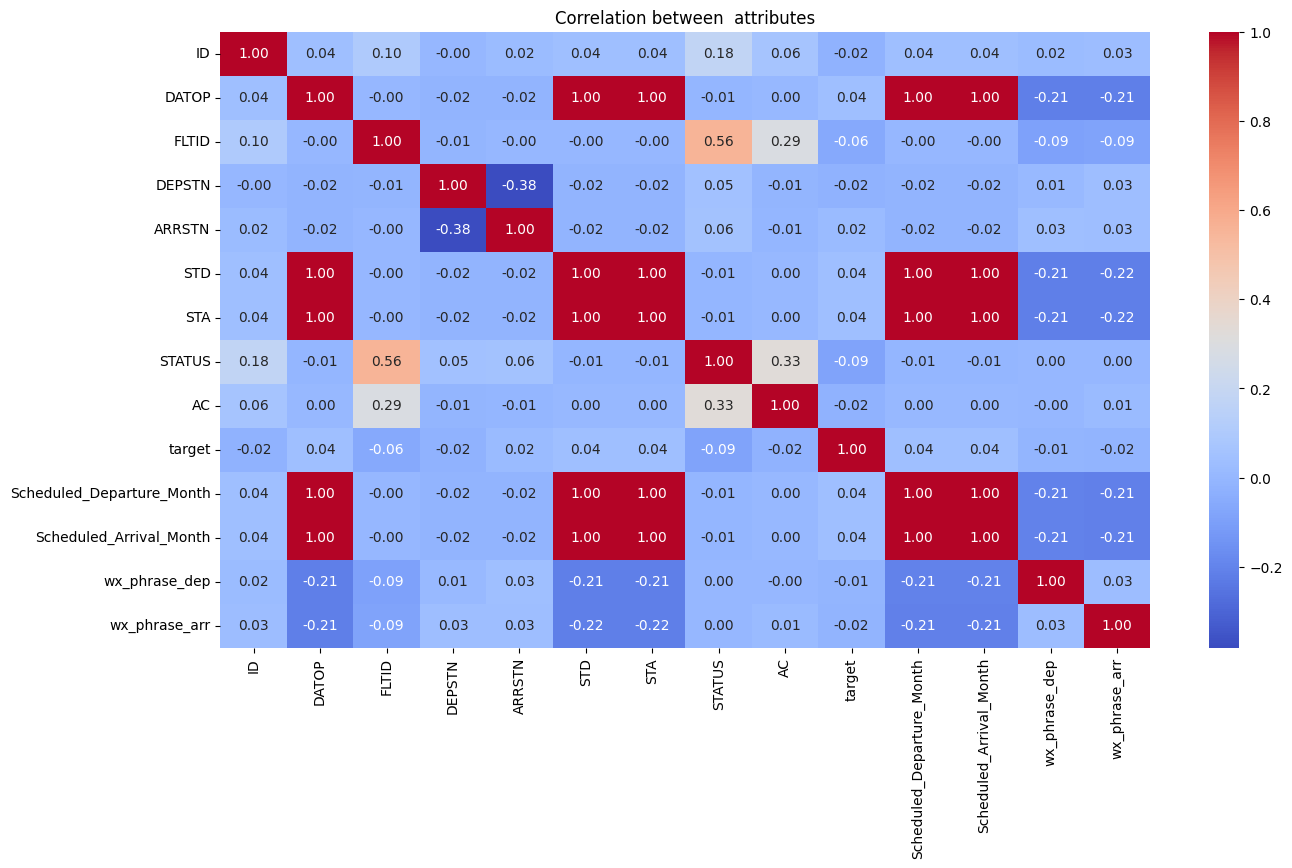

,ID,DATOP,FLTID,DEPSTN,ARRSTN,STD,STA,STATUS,AC,target,Scheduled_Departure_Month,Scheduled_Arrival_Month,wx_phrase_dep,wx_phrase_arr
0,0.0,2016-01-03,156.0,19.0,80.0,2016-01-03 10:30:00,2016-01-03 12:55:00,0.0,24.0,260.0,1,1,22.0,23.0
1,1.0,2016-01-13,181.0,52.0,80.0,2016-01-13 15:05:00,2016-01-13 16:55:00,0.0,8.0,20.0,1,1,4.0,4.0
2,11112.0,2016-01-16,55.0,80.0,34.0,2016-01-16 04:10:00,2016-01-16 06:45:00,0.0,24.0,0.0,1,1,24.0,NaN
3,22223.0,2016-01-17,99.0,22.0,59.0,2016-01-17 14:10:00,2016-01-17 17:00:00,0.0,28.0,0.0,1,1,25.0,20.0
4,24382.0,2016-01-17,75.0,80.0,2.0,2016-01-17 14:30:00,2016-01-17 15:50:00,0.0,13.0,22.0,1,1,24.0,23.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31043,23385.0,2016-03-15,986.0,30.0,79.0,2016-03-15 15:25:00,2016-03-15 15:50:00,4.0,39.0,0.0,3,3,NaN,NaN
31044,23386.0,2016-07-26,972.0,80.0,22.0,2016-07-26 06:00:00,2016-07-26 07:00:00,4.0,35.0,0.0,7,7,NaN,NaN
31045,23387.0,2016-03-06,77.0,80.0,11.0,2016-03-06 13:35:00,2016-03-06 15:10:00,0.0,8.0,14.0,3,3,NaN,NaN
31046,23388.0,2016-01-18,972.0,80.0,22.0,2016-01-18 06:15:00,2016-01-18 07:15:00,4.0,39.0,0.0,1,1,NaN,NaN


In [ ]:
df = data.copy()
col_object = list(data.select_dtypes(include='object').columns)
df[col_object] = df[col_object].astype('category')
encoder = OrdinalEncoder()
df[col_object] = df[col_object].apply(lambda x: encoder.fit_transform(x.values.reshape(-1, 1)).flatten())

correlation_matrix=df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation between  attributes")
plt.show()
df

What's the most common delay time?

---



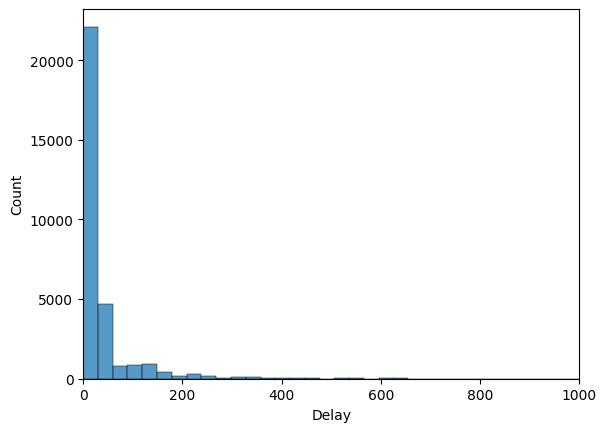

In [ ]:
sns.histplot(data = data, x = "target",bins=100)
plt.xlim(left = 0,right=1000)
# plt.ylim(bottom = 0, top = 800)
plt.title("")
plt.xlabel("Delay")
plt.show()

The histogram shows that around 70% of flights (75 000 out of 107 833 )  arrive on time , making *no-delay* the most frequent delay time. Delays in the range *30mins-200mins* are the second most frequent followed by those in the range *200mins-400mins*. Delays beyond *500mins* are extremely rare.

Text(0.5, 0, 'delay (minutes)')

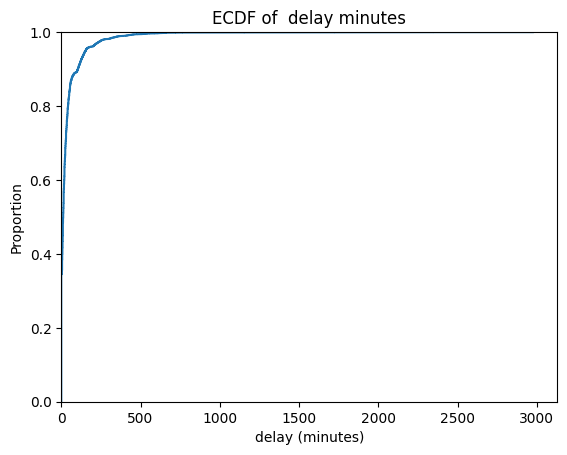

In [ ]:
sns.ecdfplot(data = data, x = "target")
plt.xlim(left = 0)
plt.ylim(bottom = 0, top = 1)
plt.title("ECDF of  delay minutes")
plt.xlabel("delay (minutes)")

The ECDF shows the proportion of delay times (y-axis) that are less than or equal to a specific value (x-axis).

The curve begins at 0 with a starting proportion of 60%, indicating that 60% of flights experience no delay. It then rises steeply, reaching 80% at around 250 minutes, suggesting that the majority of delayed flights experience a delay of 250 minutes or less. Between 250 and 600 minutes, the curve evolves more gradually, reflecting that delays in this range are less common. Finally, the curve flattens near 100% at approximately 1000 minutes, indicating that severe delays exceeding 1000 minutes are exceedingly rare.


Which aircrafts experience the highest delays?

---



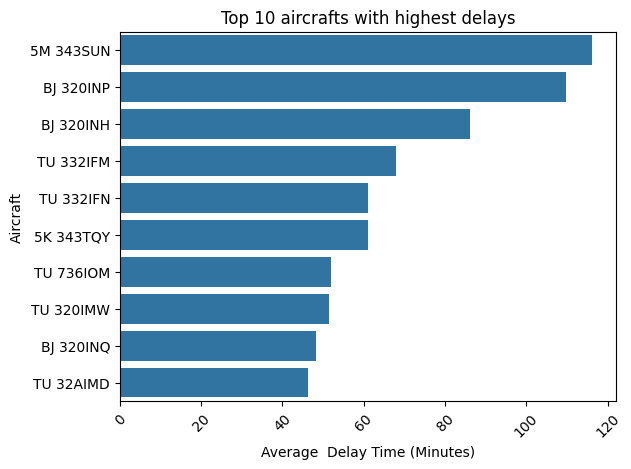

In [ ]:
df = data.groupby('AC')['target'].mean().reset_index()
df_top10 = df.sort_values(by='target', ascending=False).head(10)
sns.barplot(data=df_top10, x='target', y='AC', errorbar=None)
plt.title("Top 10 aircrafts with highest delays")
plt.xlabel("Average  Delay Time (Minutes)")
plt.ylabel("Aircraft")
plt.xticks(rotation=45)
plt.show()

Which departure airports experience the highest delays?

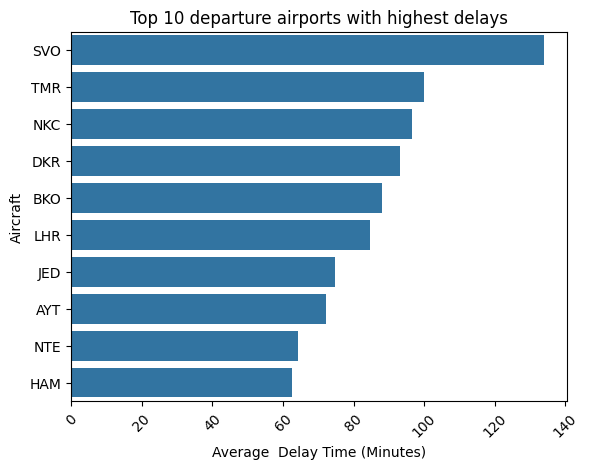

In [ ]:
df = data.groupby('DEPSTN')['target'].mean().reset_index()
df_top10 = df.sort_values(by='target', ascending=False).head(10)
sns.barplot(data=df_top10, x='target', y='DEPSTN', errorbar=None)
plt.title("Top 10 departure airports with highest delays")
plt.xlabel("Average  Delay Time (Minutes)")
plt.ylabel("Aircraft")
plt.xticks(rotation=45)
plt.show()

Which arrival airports experience the highest delays?

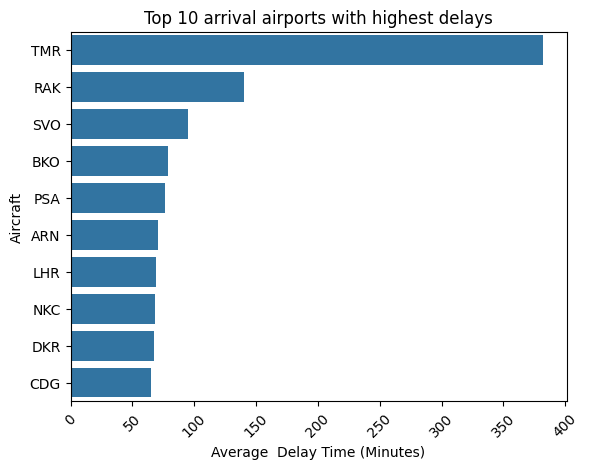

In [ ]:
df = data.groupby('ARRSTN')['target'].mean().reset_index()
df_top10 = df.sort_values(by='target', ascending=False).head(10)
sns.barplot(data=df_top10, x='target', y='ARRSTN', errorbar=None)
plt.title("Top 10 arrival airports with highest delays")
plt.xlabel("Average  Delay Time (Minutes)")
plt.ylabel("Aircraft")
plt.xticks(rotation=45)
plt.show()

What months experience the highest delay times?

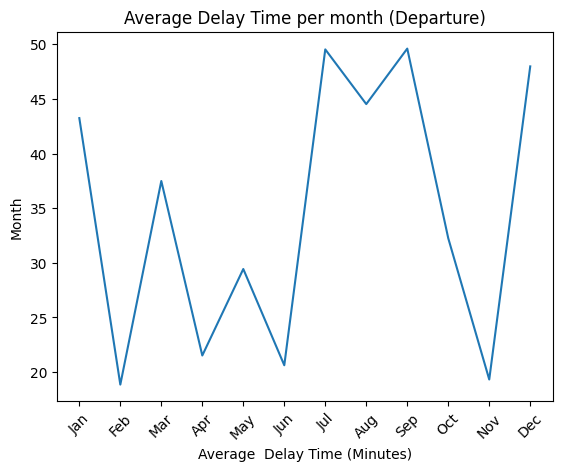

In [ ]:
df = data.groupby('Scheduled_Departure_Month')['target'].mean().reset_index().sort_values(by='target', ascending=False)
sns.lineplot(data=df, x='Scheduled_Departure_Month', y='target', errorbar=None)
plt.title("Average Delay Time per month (Departure)")
plt.xlabel("Average  Delay Time (Minutes)")
plt.ylabel("Month")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

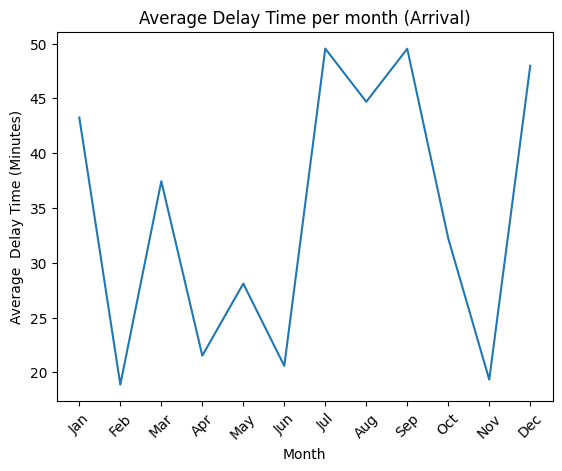

In [ ]:
df = data.groupby('Scheduled_Arrival_Month')['target'].mean().reset_index().sort_values(by='target', ascending=False)
sns.lineplot(data=df, x='Scheduled_Arrival_Month', y='target', errorbar=None)
plt.title("Average Delay Time per month (Arrival)")
plt.ylabel("Average  Delay Time (Minutes)")
plt.xlabel("Month")
plt.xticks(ticks=range(1, 13), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()

The graphs show that* August* experiences the highest average delay time, with a peak of 65 minutes, followed by *May and December* at 55 minutes, and then *April* at 52 minutes. This pattern is likely correlated with major holiday seasons, such as the Summer holidays in August, Christmas and Winter holidays in December, and Spring holidays, including Easter in April/May depending on the region.

## Add weather data



In [ ]:
weather_api_key = "e1f10a1e78da46f5b10a1e78da96f525"
# URL to request


def get_weather_api_url(airport_icao_code, country_code, start_date,end_date = None, weather_api_key= weather_api_key):
    if(end_date == None):
      end_date = start_date
    return f'https://api.weather.com/v1/location/{airport_icao_code}:9:{country_code}/observations/historical.json?apiKey={weather_api_key}&units=m&startDate={start_date}&endDate={end_date}'


In [ ]:
iata_to_icao_airport_codes = pd.read_csv("./iata-icao.csv")
iata_airport_info_dict = {}
for row in iata_to_icao_airport_codes.itertuples():
    iata_airport_info_dict[row.iata] = row

In [ ]:
def get_weather_from_resp(response, timestamp, fields_to_get =["wx_phrase"], is_departure = True):
  if (response.get("observations") is None):
    return {}
  timestamp = timestamp.timestamp() # convert to unix datetime
  observations = response['observations']
  closest_observation = min(observations, key=lambda obs: abs(obs['valid_time_gmt'] - timestamp))
  if (is_departure):
    suffix ="_dep"
  else:
    suffix = "_arr"
  return {field + suffix : closest_observation.get(field) for field in fields_to_get}


In [ ]:
for idx, flight_details in data.iterrows():
    STD = flight_details.STD.date().strftime('%Y%m%d')
    STA = flight_details.STA.date().strftime('%Y%m%d')
    if (not pd.isna(flight_details.wx_phrase_dep) or not pd.isna(flight_details.wx_phrase_arr) ):
        continue
    url = get_weather_api_url(iata_airport_info_dict[flight_details.DEPSTN].icao,
                              iata_airport_info_dict[flight_details.DEPSTN].country_code, STD)
    print(idx)
    time.sleep(1)

    response = requests.get(url).json()
    weather = get_weather_from_resp(response, flight_details.STD, is_departure = True)
    for key, value in weather.items():
        data.at[idx, key] = value

    time.sleep(1)
    url = get_weather_api_url(iata_airport_info_dict[flight_details.ARRSTN].icao,
                              iata_airport_info_dict[flight_details.ARRSTN].country_code, STA)
    response = requests.get(url).json()
    weather = get_weather_from_resp(response, flight_details.STD, is_departure = False)
    for key, value in weather.items():
        data.at[idx, key] = value


13058
13059
13060
13061
13062
13063
13064
13065
13066
13067
13068
13069
13070
13071
13072
13073
13074
13075
13076
13077
13078
13079
13080
13081
13082
13083
13084
13085
13086
13087
13088
13089
13090
13091
13092
13093
13094
13095
13096
13097
13098
13099
13100
13101
13102
13103
13104
13105
13106
13107
13108
13109
13110
13111
13112
13113
13114
13115
13116
13117
13118
13119
13120
13121
13122
13123
13124
13125
13126
13127
13128
13129
13130
13131
13132
13133
13134
13135
13136
13137
13138
13139
13140
13141
13142
13143
13144
13145
13146
13147
13148
13149
13150
13151
13152
13153
13154
13155
13156
13157
13158
13159
13160
13161
13162
13163
13164
13165
13166
13167
13168
13169
13170
13171
13172
13173
13174
13175
13176
13177
13178
13179
13180
13181
13182
13183
13184
13185
13186
13187
13188
13189
13190
13191
13192
13193
13194
13195
13196
13197
13198
13199
13200
13201
13202
13203
13204
13205
13206
13207
13208
13209
13210
13211
13212
13213
13214
13215
13216
13217
13218
13219
13220
13221
13222
13223
1322

In [ ]:
# airports_dates_dict = {}
# airport_codes=set(np.concatenate((data.ARRSTN.unique(), data.DEPSTN.unique())))
# for airport in airport_codes:
#   airports_dates_dict[airport] = ( date.max.date(),date.min.date())

In [ ]:
# for idx, flight_details in data.iterrows():
#     STD = flight_details.STD.date().strftime('%Y%m%d')
#     STA = flight_details.STA.date().strftime('%Y%m%d')
#     if (not pd.isna(flight_details.wx_phrase_dep)):
#         continue
#     airports_dates_dict[flight_details.DEPSTN] = (min(airports_dates_dict[flight_details.DEPSTN][0], flight_details.STD.date()), max(airports_dates_dict[flight_details.DEPSTN][1], flight_details.STD.date()))
#     airports_dates_dict[flight_details.ARRSTN] = (min(airports_dates_dict[flight_details.ARRSTN][0], flight_details.STA.date()), max(airports_dates_dict[flight_details.ARRSTN][1], flight_details.STA.date()))


In [ ]:
# weather_api_resp={}
# for airport, dates in airports_dates_dict.items():
#   print(dates[0].strftime('%Y%m%d'), dates[1].strftime('%Y%m%d'))
  # url = get_weather_api_url(iata_airport_info_dict[airport].icao,
  #                             iata_airport_info_dict[airport].country_code, dates[0].strftime('%Y%m%d'), dates[1].strftime('%Y%m%d'))
  # weather_api_resp[airport] = requests.get(url).json()

In [ ]:
print(data.wx_phrase_dep.isna().sum())
print(data.shape)

In [ ]:
data.to_csv("./train+weather.csv",index=False, header=True)


In [ ]:
from google.colab import files
files.download('./train+weather.csv')

## Extracting data from aviationstack Api

In [ ]:
params = {
    'access_key': userdata.get('ACCESS_KEY'),
}

api_result = requests.get('https://api.aviationstack.com/v1/flights', params)
api_response = api_result.json()
print(api_response)

with open('flight_data.json', 'w', encoding='utf-8') as file:
    file.write(api_result.text)

{'pagination': {'limit': 100, 'offset': 0, 'count': 100, 'total': 428990}, 'data': [{'flight_date': '2024-12-13', 'flight_status': 'active', 'departure': {'airport': 'Auckland International', 'timezone': 'Pacific/Auckland', 'iata': 'AKL', 'icao': 'NZAA', 'terminal': 'I', 'gate': '10', 'delay': 21, 'scheduled': '2024-12-13T00:55:00+00:00', 'estimated': '2024-12-13T00:55:00+00:00', 'actual': '2024-12-13T01:15:00+00:00', 'estimated_runway': '2024-12-13T01:15:00+00:00', 'actual_runway': '2024-12-13T01:15:00+00:00'}, 'arrival': {'airport': 'Singapore Changi', 'timezone': 'Asia/Singapore', 'iata': 'SIN', 'icao': 'WSSS', 'terminal': None, 'gate': None, 'baggage': None, 'delay': None, 'scheduled': '2024-12-13T06:30:00+00:00', 'estimated': '2024-12-13T06:30:00+00:00', 'actual': None, 'estimated_runway': None, 'actual_runway': None}, 'airline': {'name': 'Singapore Airlines', 'iata': 'SQ', 'icao': 'SIA'}, 'flight': {'number': '282', 'iata': 'SQ282', 'icao': 'SIA282', 'codeshared': None}, 'aircraf

In [ ]:
data = []
# Extract relevant flight details from the JSON response and organize them into a structured pandas DataFrame
with open('flight_data.json', 'r', encoding='utf-8') as file:
    json_data = json.load(file)

    for flight in json_data.get('data', []):
        departure = flight.get('departure', {})
        arrival = flight.get('arrival', {})
        aircraft = flight['aircraft'].get('iata', None) if flight.get('aircraft') else None

        data.append({
            'DATOP': flight.get('flight_date'),
            'DEPSTN': departure.get('iata'),
            'ARRSTN': arrival.get('iata'),
            'STD': departure.get('scheduled'),
            'STA': arrival.get('scheduled'),
            'ETD': departure.get('estimated'),
            'ETA': arrival.get('estimated'),
            'ATD': departure.get('actual') or departure.get('actual_runway'),
            'ATA': arrival.get('actual') or arrival.get('actual_runway'),
            'AC': aircraft,
            'target': departure.get('delay') or arrival.get('delay'),
        })

df = pd.DataFrame(data)

In [ ]:
df.head()

,DATOP,DEPSTN,ARRSTN,STD,STA,ETD,ETA,ATD,ATA,AC,target
0,2024-12-13,CNS,CNS,2024-12-13T07:30:00+00:00,2024-12-12T09:02:00+00:00,2024-12-13T07:30:00+00:00,2024-12-12T09:02:00+00:00,2024-12-12T08:05:00+00:00,None,None,7.0
1,2024-12-12,KKE,AKL,2024-12-12T09:50:00+00:00,2024-12-12T10:35:00+00:00,2024-12-12T09:50:00+00:00,2024-12-12T10:35:00+00:00,None,None,None,NaN
2,2024-12-12,JJN,NTG,2024-12-12T00:30:00+00:00,2024-12-12T02:15:00+00:00,2024-12-12T00:30:00+00:00,2024-12-12T02:15:00+00:00,None,None,None,NaN
3,2024-12-12,YNT,BKK,2024-12-12T02:00:00+00:00,2024-12-12T04:00:00+00:00,2024-12-12T02:00:00+00:00,2024-12-12T04:00:00+00:00,None,None,None,NaN
4,2024-12-12,CHC,SIN,2024-12-12T01:05:00+00:00,2024-12-12T06:40:00+00:00,2024-12-12T01:05:00+00:00,2024-12-12T06:40:00+00:00,2024-12-12T01:47:00+00:00,None,None,43.0


In [ ]:
df.describe()

,target
count,74.000000
mean,24.310811
std,17.156752
min,2.000000
25%,12.000000
50%,20.000000
75%,35.000000
max,92.000000


In [ ]:
#transform attributes STD,STA and DATOP to date format
for col in ['ATA', 'STA', 'ATD', 'STD']:
    df[col] = pd.to_datetime(df[col], errors='coerce')

In [ ]:
#extract a month attribute from  date attributes STD and STA
df['Scheduled_Departure_Month'] = df['STD'].dt.month
df['Scheduled_Arrival_Month'] = df['STA'].dt.month

In [ ]:
#calculate null value percentage
print(df.isnull().sum() / len(df) * 100)

DATOP                         0.0
DEPSTN                        0.0
ARRSTN                        0.0
STD                           0.0
STA                           0.0
ETD                           0.0
ETA                           0.0
ATD                          24.0
ATA                          62.0
AC                           53.0
target                       26.0
Scheduled_Departure_Month     0.0
Scheduled_Arrival_Month       0.0
dtype: float64


In [ ]:
# Drop rows where 'target' is null and either 'actual_arrival_time' or 'actual_departure_time' is null
df = df[~(df['target'].isna() & (df['ATD'].isna() | df['ATA'].isna()))]
df.shape

(78, 13)

In [ ]:
# Calculate arrival and departure delays, ensuring non-negative values
df['target'] = (
    (df['ATA'].fillna(df['STA']) - df['STA']).dt.total_seconds() / 60
).clip(lower=0) + (
    (df['ATD'].fillna(df['STD']) - df['STD']).dt.total_seconds() / 60
).clip(lower=0)


In [ ]:
#aicrafts
print(df['AC'].unique())

[None 'A359' 'A333' 'B463' 'A339' 'A321' 'B752' 'B738' 'B733' 'B77W'
 'B77L' 'A332' 'B78X' 'A320' 'B744' 'B789' 'A21N' 'B38M']


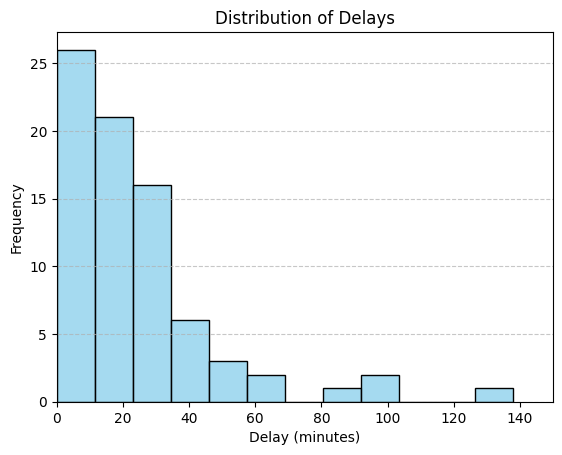

In [ ]:
sns.histplot(data=df, x="target", color="skyblue")
plt.xlim(left=0, right=150)
plt.title("Distribution of Delays")
plt.xlabel("Delay (minutes)")
plt.ylabel("Frequency")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [ ]:
data.columns

Index(['ID', 'DATOP', 'FLTID', 'DEPSTN', 'ARRSTN', 'STD', 'STA', 'STATUS',
       'AC', 'target', 'Scheduled_Departure_Month', 'Scheduled_Arrival_Month'],
      dtype='object')

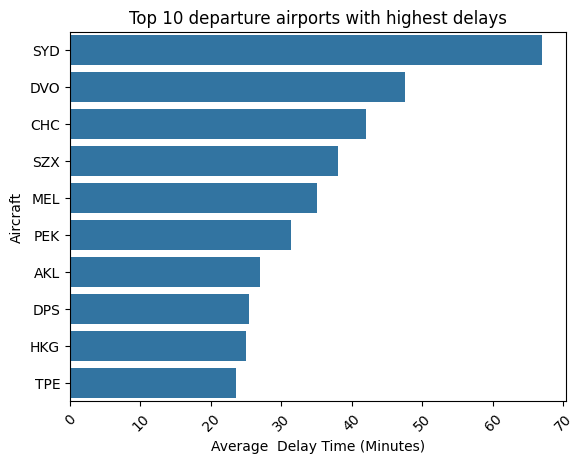

In [ ]:
grouped_df = df.groupby('DEPSTN')['target'].mean().reset_index()
df_top10 = grouped_df.sort_values(by='target', ascending=False).head(10)
sns.barplot(data=df_top10, x='target', y='DEPSTN', errorbar=None)
plt.title("Top 10 departure airports with highest delays")
plt.xlabel("Average  Delay Time (Minutes)")
plt.ylabel("Aircraft")
plt.xticks(rotation=45)
plt.show()